In [4]:
import os
from keras.preprocessing.image import ImageDataGenerator

base_dir = r'C:\Users\kyawh\Desktop\Machine Learning\face_shape_one'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Rescale all images by the rescale factor
rescale_factor = 1./255
# Training data will be augmented to mitigate overfitting
train_datagen = ImageDataGenerator(
                rescale= rescale_factor,
                rotation_range= 40,
                width_shift_range= 0.2,
                height_shift_range= 0.2,
                shear_range= 0.2,
                zoom_range= 0.2,
                horizontal_flip= True)

valid_datagen = ImageDataGenerator(rescale= rescale_factor)
test_datagen = ImageDataGenerator(rescale= rescale_factor)

train_generator = train_datagen.flow_from_directory(
                        train_dir, 
                        target_size= (150, 150),
                        batch_size= 30,
                        class_mode= 'categorical')

valid_generator = valid_datagen.flow_from_directory(
                        validation_dir, 
                        target_size= (150, 150),
                        batch_size= 10,
                        class_mode= 'categorical')

test_generator = test_datagen.flow_from_directory(
                        test_dir, 
                        target_size= (150, 150),
                        batch_size= 10,
                        class_mode= 'categorical')

Found 400 images belonging to 5 classes.
Found 50 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


In [5]:
'''
Instantiating a model for face shape classification
'''
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(64, (3,3), activation= 'relu', input_shape= (150,150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation= 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(512, (3,3), activation= 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(512, (3,3), activation= 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation= 'relu'))
model.add(layers.Dense(5, activation= 'softmax'))

In [6]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 512)       590336    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 512)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 512)      

In [7]:
'''
Compiling the model for training
'''
from keras import optimizers
model.compile(loss= 'categorical_crossentropy',
              optimizer= optimizers.RMSprop(lr=1e-4),
              metrics= ['acc'])

In [8]:
'''
Fitting the model
'''
STEP_SIZE_TRAIN= train_generator.n//train_generator.batch_size
STEP_SIZE_VALID= valid_generator.n//valid_generator.batch_size


history = model.fit_generator(
            train_generator, 
            steps_per_epoch= STEP_SIZE_TRAIN,
            epochs= 60, 
            validation_data= valid_generator,
            validation_steps = STEP_SIZE_VALID)
    

Epoch 1/60
13/13 [==============================] - 38s 3s/step - loss: 1.6274 - acc: 0.1757 - val_loss: 1.5937 - val_acc: 0.1800
Epoch 2/60
13/13 [==============================] - 38s 3s/step - loss: 1.6155 - acc: 0.1744 - val_loss: 1.5896 - val_acc: 0.2400
Epoch 3/60
13/13 [==============================] - 35s 3s/step - loss: 1.6076 - acc: 0.1973 - val_loss: 1.5990 - val_acc: 0.2400
Epoch 4/60
13/13 [==============================] - 35s 3s/step - loss: 1.6068 - acc: 0.2057 - val_loss: 1.5746 - val_acc: 0.3200
Epoch 5/60
13/13 [==============================] - 39s 3s/step - loss: 1.5878 - acc: 0.2595 - val_loss: 1.6197 - val_acc: 0.3000
Epoch 6/60
13/13 [==============================] - 38s 3s/step - loss: 1.5743 - acc: 0.2730 - val_loss: 1.5077 - val_acc: 0.3200
Epoch 7/60
13/13 [==============================] - 38s 3s/step - loss: 1.5466 - acc: 0.2564 - val_loss: 1.4903 - val_acc: 0.4000
Epoch 8/60
13/13 [==============================] - 35s 3s/step - loss: 1.5312 - acc: 0.29

In [9]:
# Save the model
model.save('face_shape_one_custom_1.h5')

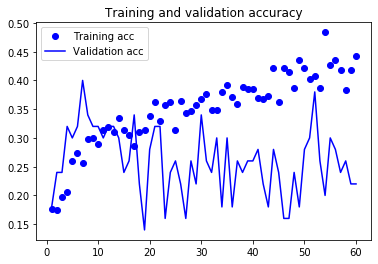

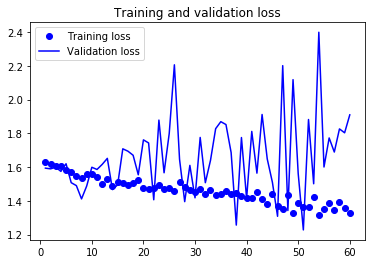

In [10]:
# Plotting the results
import matplotlib.pyplot as plt

acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend()
plt.show()


In [11]:
# Evaluate the model with the test dataset
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size

test_loss, test_acc = model.evaluate_generator(test_generator, steps= STEP_SIZE_TEST )
print('Accuracy on the test dataset: ', round(test_acc*100), '%')

Accuracy on the test dataset:  28.0 %
